In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [105]:
df = pd.read_excel(r'C:\Users\Elias\Downloads\movies.xlsx')

In [34]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [38]:
# Missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} -- {}%'.format(col, pct_missing)) 

budget -- 0.0%
company -- 0.0%
country -- 0.0%
director -- 0.0%
genre -- 0.0%
gross -- 0.0%
name -- 0.0%
rating -- 0.0%
released -- 0.0%
runtime -- 0.0%
score -- 0.0%
star -- 0.0%
votes -- 0.0%
writer -- 0.0%
year -- 0.0%


In [40]:
# Data types 

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [106]:
# Creating a new year and released column since the released and year don't always match

df['yearcorrect']= df['released'].astype(str).str[0:4]
   
df['releasedcorrect']=df['released'].astype(str).str[0:10]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,releasedcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986,1986-08-22
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986,1986-06-11
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986,1986-05-16
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986,1986-07-18
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986,1986-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22 00:00:00,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016,2016-07-22
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06 00:00:00,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016,2016-05-06
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25 00:00:00,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016,2016-07-25
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02 00:00:00,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016,2016-12-02


In [107]:
# Sorting by gross 

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,releasedcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18 00:00:00,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015,2015-12-18
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18 00:00:00,162,7.8,Sam Worthington,954412,James Cameron,2009,2009,2009-12-18
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19 00:00:00,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997,1997-12-19
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12 00:00:00,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015,2015-06-12
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04 00:00:00,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012,2012-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12 00:00:00,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013,2013-04-12
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09 00:00:00,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012,2012-03-09
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19 00:00:00,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014,2014-01-19
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01 00:00:00,84,5.7,Will Friedle,5034,Andy Burg,1997,1997,1997-10-01


In [122]:
pd.set_option('display.max_rows', None)

In [103]:
# Checking for duplicates

df['company'].sort_values(ascending=False)

5288    2178
3486    2177
6084    2176
3225    2175
2707    2174
        ... 
2815       3
3208       2
3832       1
6785       0
6801       0
Name: company, Length: 6820, dtype: int16

In [63]:
# Correlations: Budget, Copmany, and Country

<function matplotlib.pyplot.show(close=None, block=None)>

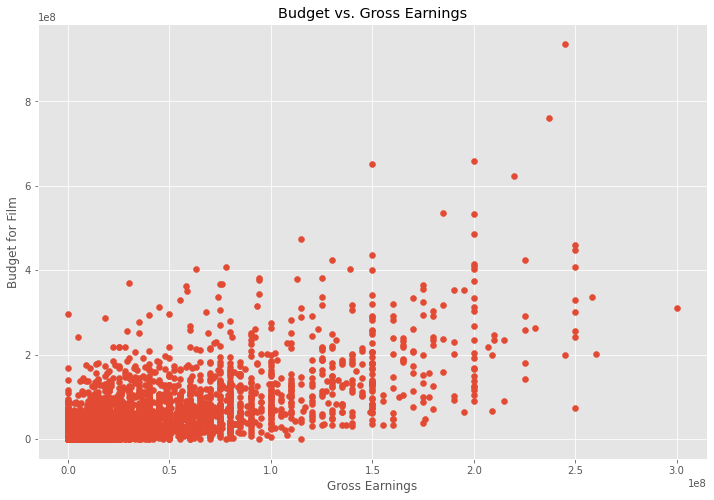

In [108]:
# Budget vs. Gross Earnings

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show



In [109]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,releasedcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18 00:00:00,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015,2015-12-18
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18 00:00:00,162,7.8,Sam Worthington,954412,James Cameron,2009,2009,2009-12-18
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19 00:00:00,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997,1997-12-19
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12 00:00:00,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015,2015-06-12
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04 00:00:00,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012,2012-05-04


<AxesSubplot:xlabel='budget', ylabel='gross'>

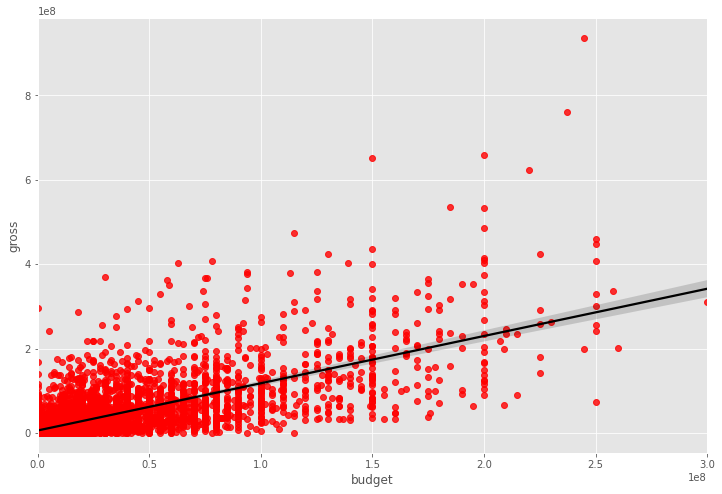

In [84]:
# Budget vs. Gross with Seaborn 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"black"})

In [87]:
# Examining correlation

df.corr(method='pearson') #Pearson*, Kendall, Spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [92]:
df.corr(method='kendall') #Pearson, Kendall*, Spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [93]:
df.corr(method='spearman') #Pearson, Kendall, Spearman*

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


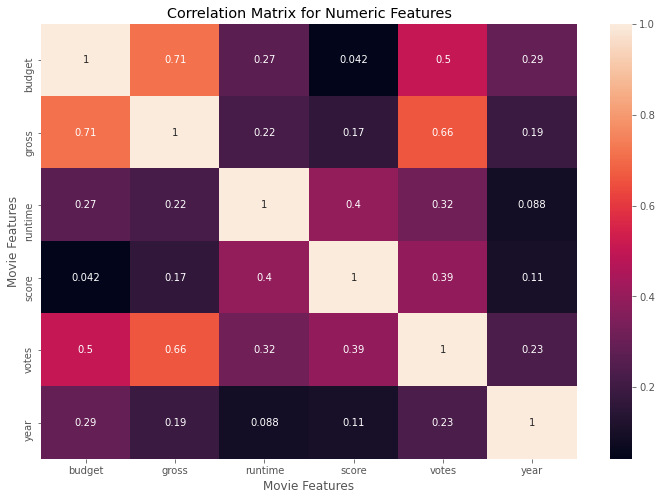

In [99]:
# Results: High correlation between Budget vs. Gross**

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [110]:
# Examining Company v. Gross


# Converting company (string) to numeric

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,releasedcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,0,136,8.1,475,687192,2356,2015,29,2290
5061,237000000,2062,53,1066,0,760507625,501,7,1,162,7.8,2084,954412,1629,2009,23,1800
2420,200000000,2062,54,1066,6,658672302,6177,7,2,194,7.8,1444,862554,1629,1997,11,910
6391,150000000,2085,54,466,0,652270625,2721,7,3,124,7.0,404,469200,3310,2015,29,2247
5723,220000000,1491,54,1412,0,623357910,4995,7,4,143,8.1,2001,1064633,2145,2012,26,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,557,104,7.2,748,16609,2981,2012,27,2059
5699,0,1262,53,2385,4,542,5204,6,747,89,6.2,1335,9018,2903,2011,26,1977
6066,0,631,54,2484,5,441,2459,8,2401,106,5.7,1047,21070,2901,2013,28,2125
2594,15000000,764,54,883,4,309,6257,7,2402,84,5.7,2459,5034,217,1997,11,895


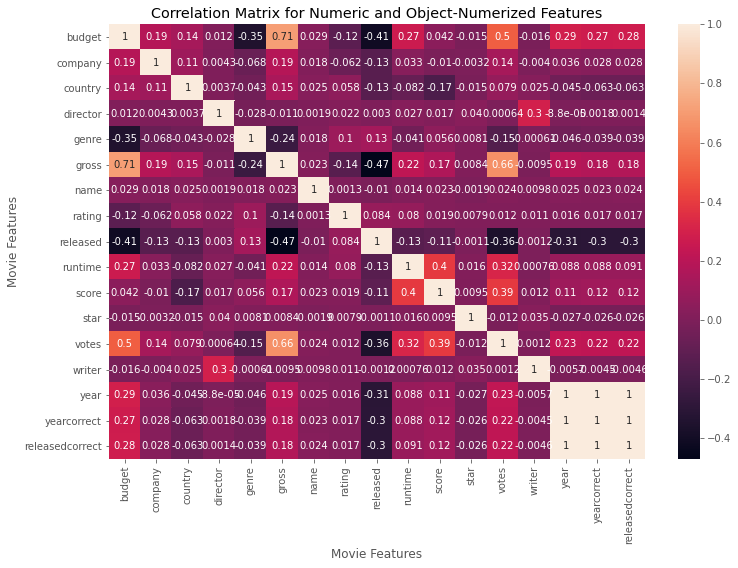

In [115]:
# Correlation between Numeric and Object-Numerized Features

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric and Object-Numerized Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [125]:
# Unstacking

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget           budget             1.000000
                 company            0.187207
                 country            0.137635
                 director           0.011602
                 genre             -0.346794
                 gross              0.712196
                 name               0.028703
                 rating            -0.119660
                 released          -0.407872
                 runtime            0.268226
                 score              0.042145
                 star              -0.015061
                 votes              0.503924
                 writer            -0.015611
                 year               0.291009
                 yearcorrect        0.274820
                 releasedcorrect    0.276635
company          budget             0.187207
                 company            1.000000
                 country            0.107943
                 director           0.004326
                 genre             -0.068332
          

In [128]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

gross            released          -0.469823
released         gross             -0.469823
                 budget            -0.407872
budget           released          -0.407872
votes            released          -0.359104
released         votes             -0.359104
genre            budget            -0.346794
budget           genre             -0.346794
year             released          -0.308635
released         year              -0.308635
                 releasedcorrect   -0.303212
releasedcorrect  released          -0.303212
yearcorrect      released          -0.300947
released         yearcorrect       -0.300947
genre            gross             -0.242676
gross            genre             -0.242676
score            country           -0.174414
country          score             -0.174414
genre            votes             -0.150519
votes            genre             -0.150519
gross            rating            -0.135538
rating           gross             -0.135538
released  

In [129]:
# Highest correlations between the data -- Votes and budget have the highest correlation to gross earnings
# Company and country have low correlation... and genre has a negative correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

budget           votes              0.503924
votes            budget             0.503924
gross            votes              0.662457
votes            gross              0.662457
budget           gross              0.712196
gross            budget             0.712196
year             releasedcorrect    0.996187
releasedcorrect  year               0.996187
year             yearcorrect        0.996229
yearcorrect      year               0.996229
releasedcorrect  yearcorrect        0.999389
yearcorrect      releasedcorrect    0.999389
budget           budget             1.000000
released         released           1.000000
year             year               1.000000
writer           writer             1.000000
votes            votes              1.000000
star             star               1.000000
score            score              1.000000
runtime          runtime            1.000000
rating           rating             1.000000
name             name               1.000000
gross     